In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import time
from cleanupFile import cleanUp
plt.rcParams['figure.figsize'] = (30,15)
plt.rcParams.update({'font.size': 15})

In [136]:
df = pd.read_csv("./Dataset5.csv")
cleanUp(df)
df

,Unnamed: 0,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,...,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2
0,291835,2020-01-01,23:07,MANHATTAN,10075.0,40.773640,-73.959860,"(40.77364, -73.95986)",EAST 77 STREET,LEXINGTON AVENUE,...,0,0,0,0,0,Driver Inattention/Distraction,Driver Inattention/Distraction,4381300,Sedan,PK
2,296432,2020-01-01,1:09,BROOKLYN,11224.0,40.578190,-73.987236,"(40.57819, -73.987236)",NaN,NaN,...,0,0,0,4,0,Alcohol Involvement,Unspecified,4268424,Sedan,Station Wagon/Sport Utility Vehicle
4,288116,2020-01-01,6:30,QUEENS,11434.0,40.668510,-73.766260,"(40.66851, -73.76626)",FARMERS BOULEVARD,144 AVENUE,...,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,4267540,Sedan,Sedan
5,295789,2020-01-01,3:35,QUEENS,11358.0,40.753838,-73.805824,"(40.753838, -73.805824)",161 STREET,46 AVENUE,...,0,0,0,0,0,Traffic Control Disregarded,Unspecified,4267777,Taxi,Station Wagon/Sport Utility Vehicle
6,296426,2020-01-01,2:05,BRONX,10451.0,40.818558,-73.927320,"(40.818558, -73.92732)",EAST 149 STREET,GRAND CONCOURSE,...,0,0,0,0,0,Driver Inattention/Distraction,Turning Improperly,4272938,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388184,1952350,2023-08-22,15:40,QUEENS,11366.0,40.728240,-73.791794,"(40.72824, -73.791794)",NaN,NaN,...,0,0,0,0,0,Unspecified,Unspecified,4656172,Sedan,Sedan
388186,1952353,2023-08-22,9:55,BRONX,10454.0,40.809110,-73.922874,"(40.80911, -73.922874)",NaN,NaN,...,0,0,0,0,0,Backing Unsafely,NaN,4656100,Sedan,NaN
388189,1952361,2023-08-22,13:35,QUEENS,11433.0,40.700820,-73.789540,"(40.70082, -73.78954)",MERRICK BOULEVARD,105 AVENUE,...,0,0,0,1,0,Driver Inattention/Distraction,Unspecified,4656540,Convertible,Dump
388190,1952334,2023-08-22,0:59,QUEENS,11435.0,40.693450,-73.806305,"(40.69345, -73.806305)",PRINCETON STREET,105 AVENUE,...,0,0,0,1,0,Unsafe Speed,Unspecified,4656539,Sedan,Sedan


In [137]:
time1 = time(6,00,00)
time2 = time(12,00,00)
time3 = time(16,30,00)
time4 = time(22,00,00)

def custom_time_func(row,time1,time2,time3,time4):
    if row['CRASH TIME']>=str(time4) or row['CRASH TIME']<str(time1):
        return "MID NIGHT"
    elif row['CRASH TIME']>=str(time1) and row['CRASH TIME']<str(time2):
        return "MORNING"
    elif row['CRASH TIME']>=str(time2) and row['CRASH TIME']<str(time3):
        return "AFTERNOON"
    elif row['CRASH TIME']>= str(time3) and row['CRASH TIME']<str(time4):
        return "NIGHT"

In [138]:
groupingDictionary_common = {
    "Distraction" : ["Driver Inattention/Distraction", "Outside Car Distraction", "Passenger Distraction", "Glare", "Cell Phone (hand-held)", "Cell Phone (hands-free)", "Other Electronic Device"], 
    "Car Defects" : ["Accelerator Defective", "Brakes Defective", "Headlights Defective", "Other Lighting Defects", "Steering Failure", "Tire Failure/Inadequate", "Tow Hitch Defective", "Windshield Inadequate"],
    "Substance Abuse" : ["Alcohol Involvement", "Drugs (Illegal)", "Prescription Medication"],
    "Driver not at fault" : ["Animals Action", "Lane Marking Improper/Inadequate", "Obstruction/Debris", "Other Vehicular", "Pavement Defective", "Pavement Slippery", "Pedestrian/Bicyclist/Other Pedestrian Error/Confusion", "Reaction to Other Uninvolved Vehicle", "Shoulders Defective/Improper", "Traffic Control Device Improper/Non-Working", "View Obstructed/Limited"], 
    "Driver Inexperience" : ["Driver Inexperience"], 
    "Medical/Fatigue" : ["Fatigued/Drowsy", "Fell Asleep", "Illness", "Lost Consciousness", "Physical Disability"], 
    "Traffic Rule Violation" : ["Aggressive Driving/Road Rage", "Backing Unsafely", "Failure to Keep Right", "Failure to Yield Right-of-Way", "Following Too Closely", "Oversized Vehicle", "Passing Too Closely", "Passing or Lane Usage Improper", "Traffic Control Disregarded", "Turning Improperly", "Unsafe Lane Changing", "Unsafe Speed"]
}
    
def custom_acc_type(row, column):
    for j in groupingDictionary_common.keys():
        if (column == 1):
            if row['CONTRIBUTING FACTOR VEHICLE 1'] in groupingDictionary_common[j]:
                return j
        else:
            if row['CONTRIBUTING FACTOR VEHICLE 2'] in groupingDictionary_common[j]:
                return j


In [139]:
df['CRASH DAYTIME'] = df.apply(custom_time_func,args=(time1,time2,time3,time4),axis=1)
print(df['CRASH DAYTIME'])
df['MAJOR ACCIDENT TYPE 1'] = df.apply(custom_acc_type, column=1 , axis=1)
df4 = df.groupby(by='MAJOR ACCIDENT TYPE 1')

0         MID NIGHT
2             NIGHT
4         MID NIGHT
5         MID NIGHT
6         MID NIGHT
            ...    
388184    AFTERNOON
388186    MID NIGHT
388189    AFTERNOON
388190      MORNING
388191        NIGHT
Name: CRASH DAYTIME, Length: 248686, dtype: object


In [140]:
def plot_pie_chart(df,title):
    plt.pie(df,labels = df.index,
                    autopct = '%1.1f%%',shadow = True,
                    startangle = 0,
                    wedgeprops = {"edgecolor":"black",
                            'linewidth': 2,
                            'antialiased': True})
    plt.axis('equal')  
    plt.title(title)

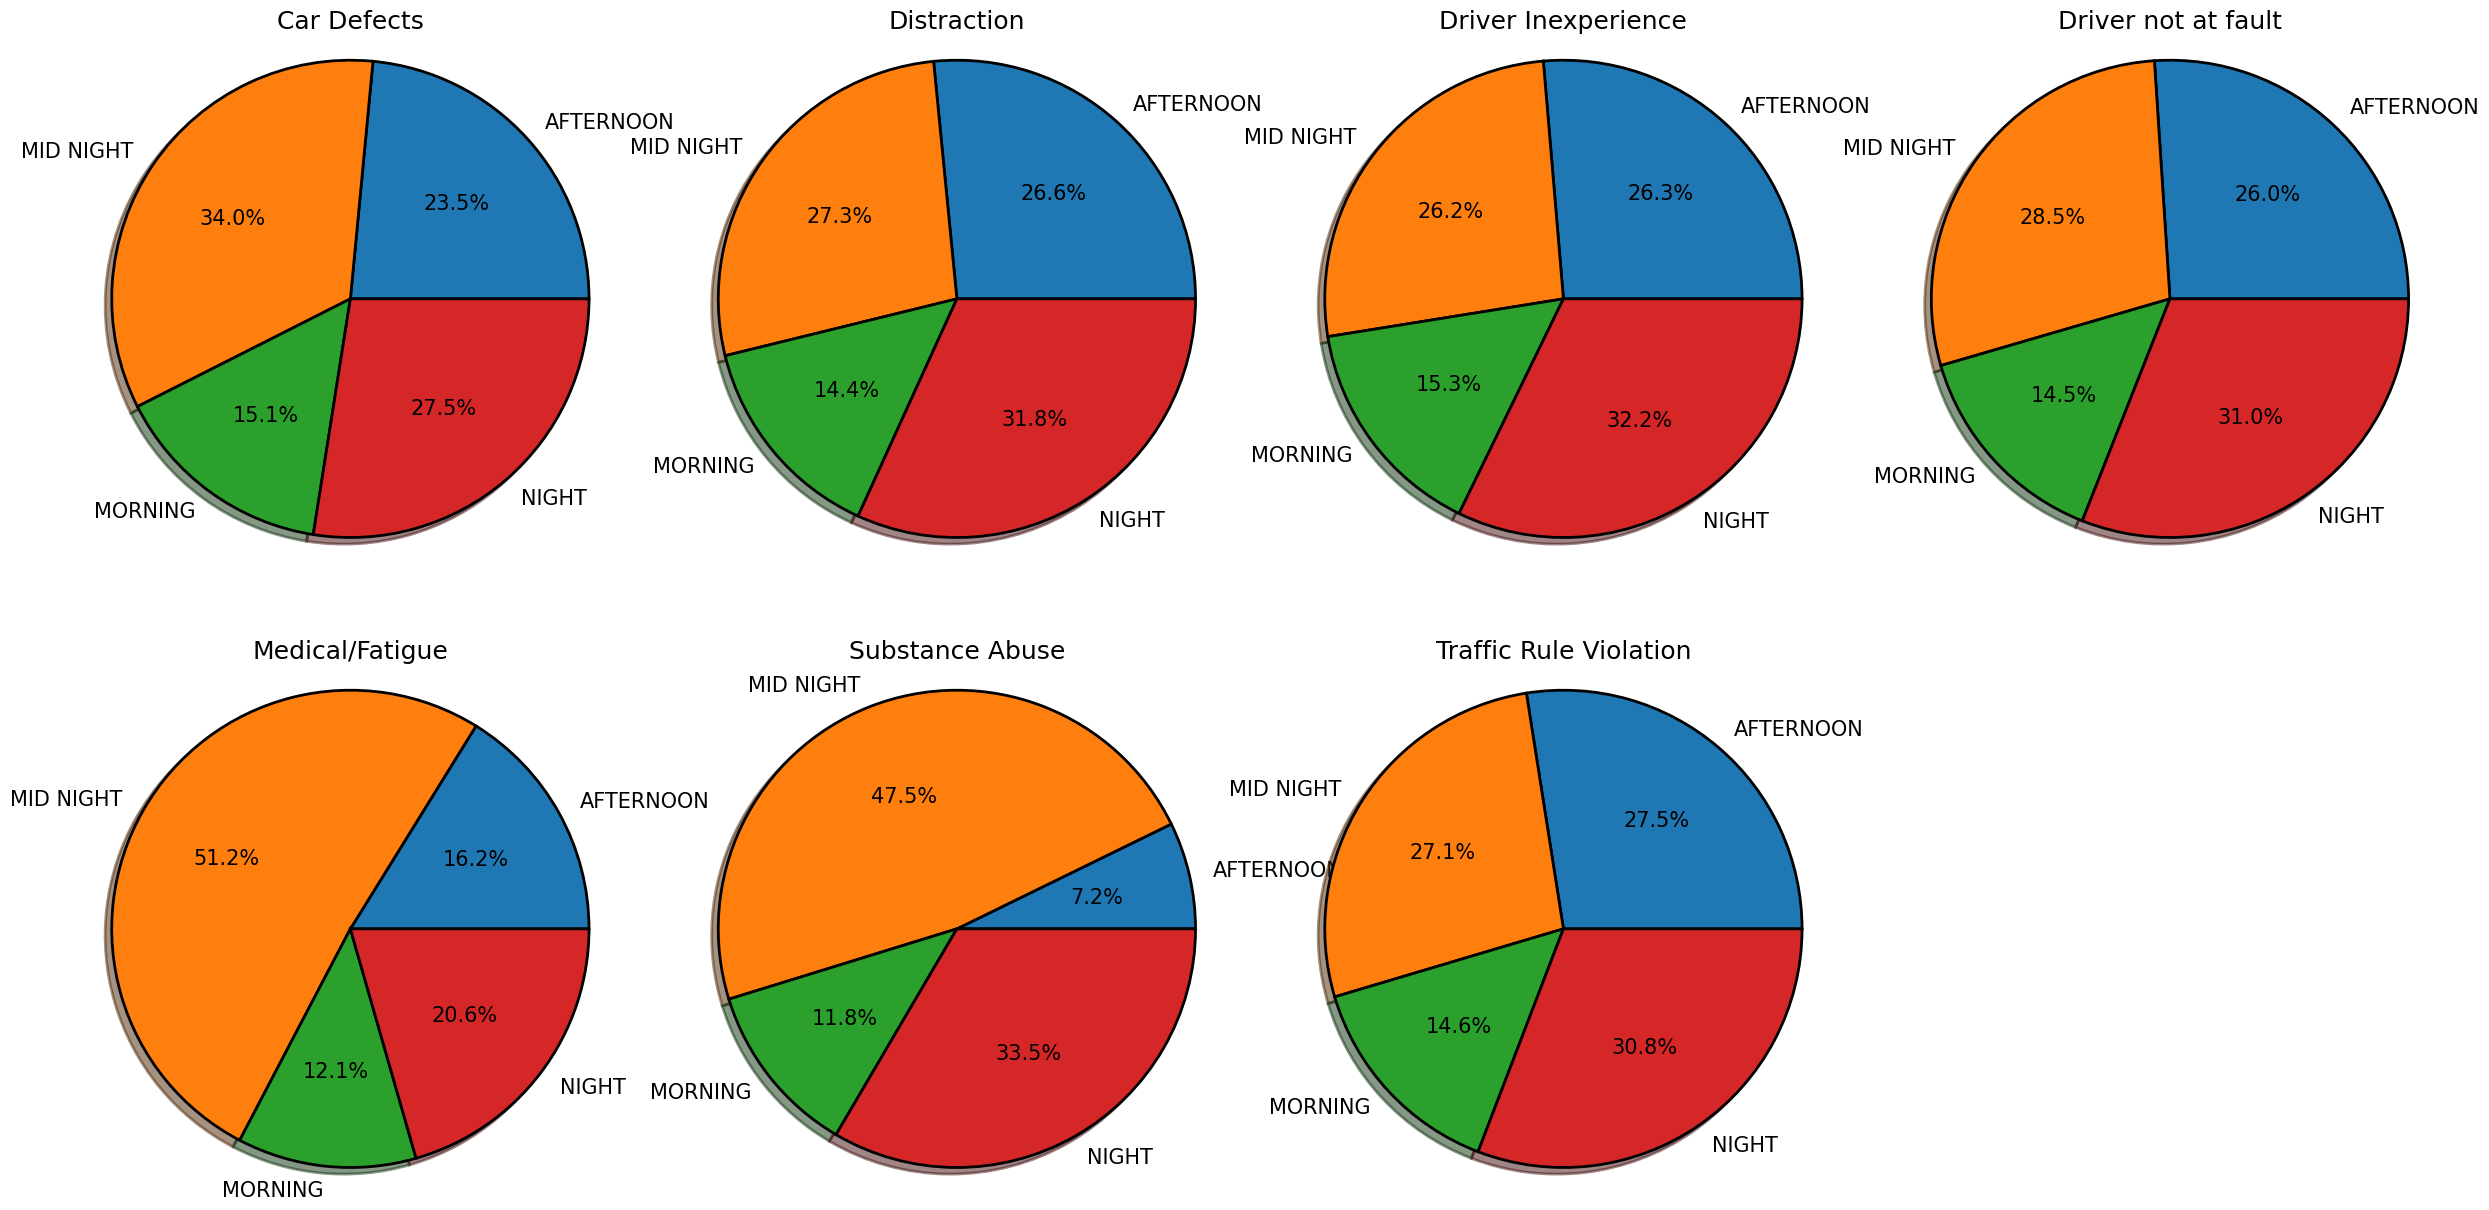

In [141]:
val = 1
for name, data_group in df4:
    df3 = data_group.groupby(by='CRASH DAYTIME').count()
    df3 = pd.Series(df3['CRASH DATE'])
    plt.subplot(2,4,val)
    plot_pie_chart(df3,name)
    val+=1

plt.show()
